#**Model making a decision on smart lights.**


CS456 | 371

### Preprerd by:
- Sarah Alaridi | 440023365 | Skmaloridi@sm.imamu.edu.sa
- Sadeem Alqahtani | 440021429 | sfaalqahtani29@sm.imamu.edu.sa
- Sarah Alsarami | 440020811 | samalsarami@sm.imamu.edu.sa
- Asia Alrajeh | 440020948 | aonalrajeh@sm.imamu.edu.sa



#### Supervisor: **Dr. Fahman Ali Esamil Saeed**

# **Define The Problem**
We are all familiar with smart light in smart homes and how important it is for human comfort and waste energy use reduction. It is also possible to perform a similar system to manage the light all time without human interference unlike other several applications that require a command of the human voice or through clicking off or on in smartphone applications.



This model is proposed to help in making a decision for open light or close or limit lights based on time, it works by taking a picture from a security camera during certain hours and then classifying this image to decide the state of lights.

# **Dataset**

The Time of Day dataset is a collection of images representing different times of the day, sunrises/sunsets, and daytime and nighttime scenes. All images have been rescaled to 224 x 224 x 3 pixels. The images were scraped from the online photography community, Unsplash, and depict various locations and weather conditions, such as clear skies, cloudy days, etc.

The dataset was collected to be used for computer vision models that can recognize and classify images based on the time of day. The built model will identify the time of day and lighting conditions in an image, which can be helpful in a variety of applications. The dataset contains 2671 high-quality images, carefully curated and labeled to ensure accuracy and consistency.




![datasetimage](https://k.top4top.io/p_2708pqh681.png)

# **Import libraries**

In [ ]:
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score


# **Load and spilt the dataset**
In order to train and test the model, the dataset will spilt into train and test by using split-folders library.

The spliltfolders take input folder path, output folder path, and ratio(train, val, test). In this project will use a preferable spilt 80% of images to train and 20% of images to test.

In [ ]:
#pip install split-folders

In [ ]:
# import splitfolders # or import splitfolders
# input_folder = "/content/drive/MyDrive/ImageProccessing_Project/dataset"
# output = "/content/drive/MyDrive/ImageProccessing_Project/Dataset"

# splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, 0, .2))

# **1. First Model (Feature Extraction + ML model)**

The first model was built in this project will pass into three step:

1. Preprocessing
2. Feature extraction(HOG)
3. Machine learning classifier
-----

**`Preprocessing:`**is a set of techniques and operations performed on images before applying any algorithm.

` Why this step is important?`

This step is used to enhance the quality of the images, remove noise or artifacts, and make them more suitable for analysis and interpretation.

The Preprocess that used in this projct:

1. Convert to a grayscale: a common preprocessing step before applying the HOG because HOG is based on the gradient information of the image, which is primarily captured in the intensity channel of the image so HOG can focus on the intensity variations of the image and ignore the color information. furthermore, grayscale images can reduce the dimensionality of the feature space.
2. Pixel normalization.

**`Feature extraction(HOG):`**
HOG (Histogram of Oriented Gradients) is a feature descriptor used in image processing to extract features from an image. It works by dividing the image into small cells, computing the gradient orientation and magnitude of each pixel in the cell, constructing a histogram of gradient orientations, and normalizing the histograms to remove variations in illumination and contrast. The resulting feature vectors can be used in many tasks.

The function below works as:
- pass a parameter in which the spilled that you want to take a features,labels.
- pass in all datasets (train or test) folder.
- read the image and do a preprocessing step.
- send the image to hog function that is proposed from scikit-image.
- save the features from the image and its label.
- return an array of data and label.


In [ ]:
def Image_hog(dataspilt):
  data = []
  label = []
  path = '/content/drive/MyDrive/Colab Notebooks/ImageProccessing_Project/Dataset/'+dataspilt+'/'
  Classes = ['daylight','nighttime','sunrise']
  for Classfolder in Classes:
    for filename in os.listdir(path + Classfolder):
      img =  io.imread(os.path.join(path + Classfolder,filename))
      if img is not None:
        # Convert image to grayscale
        image = rgb2gray(img)
        # Normalize the image
        image = image / 255.0
        hog_features, hog_image = hog(image ,visualize=True)
        data.append(hog_features)
        end = filename.find('_')
        label.append(filename[:end])
  return data,label


### Example of feature extaction using HOG


array feature: 
[0.05799253 0.         0.         ... 0.08831471 0.01204005 0.00465347]


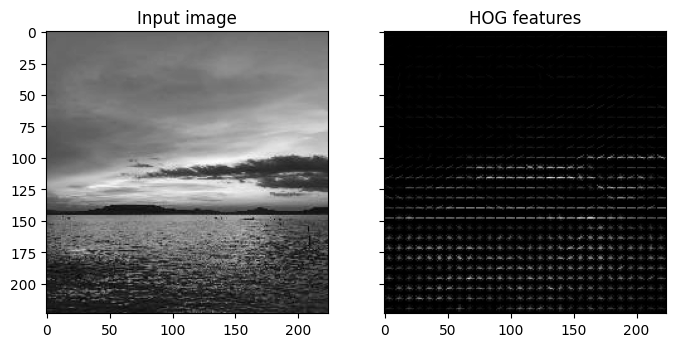

In [ ]:
# Load image
image =  io.imread('/content/drive/MyDrive/ImageProccessing_Project/dataset/sunrise/sunrise_1002.jpeg')

image = rgb2gray(image)
image = image / 255.0


# Apply HOG feature extraction
hog_features, hog_image = hog(image,visualize=True)

# Plot the pre-processed image and the HOG features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
print('array feature: ')
print(hog_features)
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG features')
plt.show()

### Fill the train and test array (x > features, y> label)


In [ ]:
# Train
x_train = []
y_train = []
x_train,y_train = Image_hog('train')
# Test
x_test = []
y_test = []
x_test,y_test = Image_hog('test')

In [ ]:
x = str(x_train[1])
y = str(y_train[1])

print('Example of image feature and label: '+ x +' , '+ y)

x = str(x_test[1])
y = str(y_test[1])

print('Example of image feature and label: '+ x +' , '+ y)


Example of image feature and label: [0.04349831 0.01935276 0.06149189 ... 0.0818267  0.15156568 0.20853956] , daylight
Example of image feature and label: [0.01571106 0.00831304 0.01001314 ... 0.         0.11648922 0.24106127] , daylight


**`Classifier:`**
we are using a four type of ML classifiers KNN, SVM, and RandomForest.

`1. KNN (K-Nearest Neighbors)` is a powerful algorithm used in machine learning for classification and regression tasks. It works by finding the K closest data points in the training set to a given test point, and then using the majority class (in classification) or the average value (in regression) of the K neighbors to predict the label or value of the test point and optimizing the performance by trying different values of K.


In [ ]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predicted_labels = knn.predict(x_test)
    accuracy = accuracy_score(y_test, predicted_labels)
    print('k =', k, 'Accuracy:', accuracy)

k = 1 Accuracy: 0.5308411214953271
k = 2 Accuracy: 0.4766355140186916
k = 3 Accuracy: 0.5588785046728972
k = 4 Accuracy: 0.5757009345794393
k = 5 Accuracy: 0.5869158878504673
k = 6 Accuracy: 0.5831775700934579
k = 7 Accuracy: 0.5869158878504673
k = 8 Accuracy: 0.5831775700934579
k = 9 Accuracy: 0.5794392523364486


The above result shows the when k = 5 get the highest accuracy.

Accuracy: 0.5869158878504673


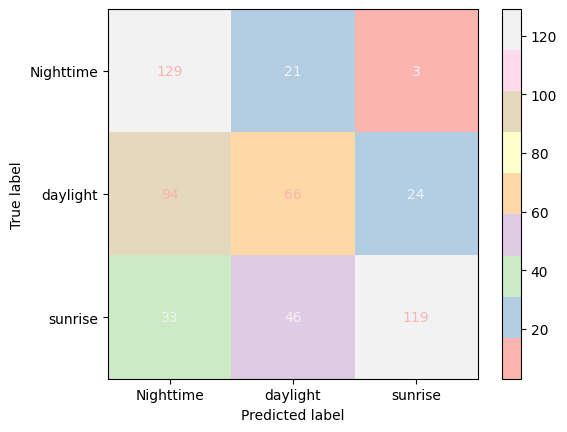

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Pastel1')


`2. SVM (Support Vector Machines)` is a supervised machine learning algorithm used for classification and regression. It works by finding the hyperplane in a high-dimensional space that maximally separates the classes of data points.

Accuracy: 0.7158878504672898


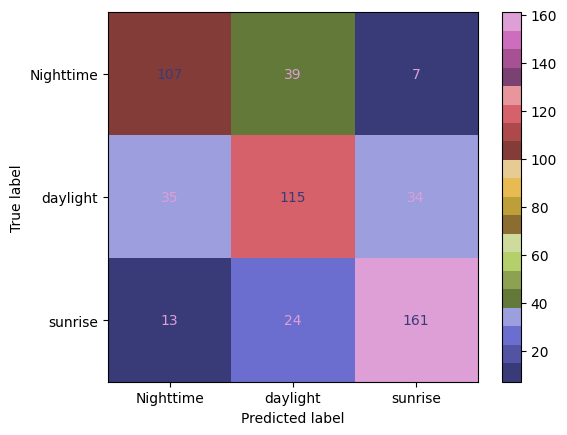

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Train the SVM model
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

# Test the SVM model
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20b')


`3. Random Forest` is a supervised machine learning algorithm used for classification and regression. It works by creating an ensemble of decision trees, where each tree is trained on a random subset of the features and data points. The final prediction is made by aggregating the predictions of all the trees.

Accuracy: 0.6560747663551402


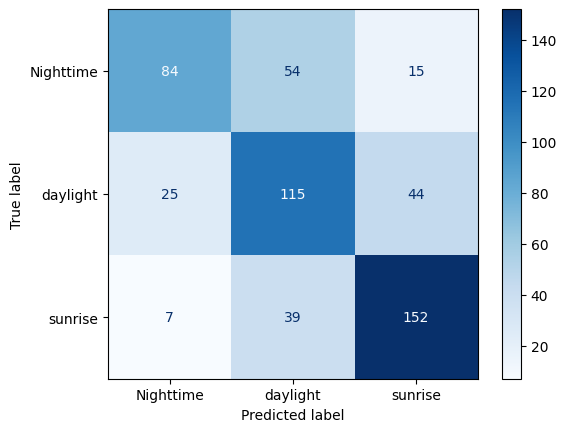

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')


## `Result:`

As we see in accuracy and confusion matrix SVM achives the highest accuracy and good than the other in prediction.


# **Second Model (Deep learning Model)**
`Effeicent netv2`

is a family of convolutional neural network (CNN) models for image classification and computer vision tasks, developed by Google researchers. It is an extension of the original EfficientNet architecture, with significant improvements in efficiency and accuracy. EfficientNetV2 models use a combination of scaling, regularization, and neural architecture search techniques to achieve state-of-the-art performance on a range of image classification benchmarks, while requiring fewer parameters and computations than previous models. We are using this model and its weight to be trained on the dataset.

In [ ]:
# standard libraries
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import matplotlib.image as mpimg
%matplotlib inline
import datetime
from tqdm.keras import TqdmCallback
from skimage import transform
import urllib
import os
# tensorflow libraries
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#Passin the path of the dataset
train_path = '/content/drive/MyDrive/ImageProccessing_Project/dataset'

In [ ]:
batch_size = 64
img_height = 224
img_width = 224
seed_train_validation = 1
shuffle_value = True
validation_split = 0.2


# load training images
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=validation_split,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  seed = seed_train_validation,
  shuffle = shuffle_value )

# load validation images
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=validation_split,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed = seed_train_validation,
    shuffle = shuffle_value )


Found 2671 files belonging to 3 classes.
Using 2137 files for training.
Found 2671 files belonging to 3 classes.
Using 534 files for validation.


In [ ]:
# target class names
class_names = train_ds.class_names
print("the target classes are: ",*class_names, sep =" ,")

the target classes are:  ,daylight ,nighttime ,sunrise


In [ ]:
# rescaling the images for the model
'''TensorFlow Hub's convention for image models is to expect float inputs in the [0, 1] range'''

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

'''finish the input pipeline by using buffered prefetching with Dataset.prefetch'''
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# get the headless model

# feature vector model
efficientnet_v2_fv = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2'
feature_extractor_model = efficientnet_v2_fv

# feature extraction layer
'''Create the feature extractor by wrapping the pre-trained model as a Keras layer with hub.KerasLayer'''
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(img_width, img_height, 3),
    trainable=False)

# add a classification layer
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 5,923,155
Trainable params: 3,843
Non-trainable params: 5,919,312
_________________________________________________________________


In [ ]:
# compile the model
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Define Epochs
NUM_EPOCHS = 20

In [ ]:
# train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=[early_stopping, TqdmCallback(verbose=0)],verbose=0)

# view model accuracy
model_acc = '{:.2%}'.format(history.history['acc'][-1])
print(f"\n Model Accuracy Reached: {model_acc}")

0epoch [00:00, ?epoch/s]


 Model Accuracy Reached: 98.18%


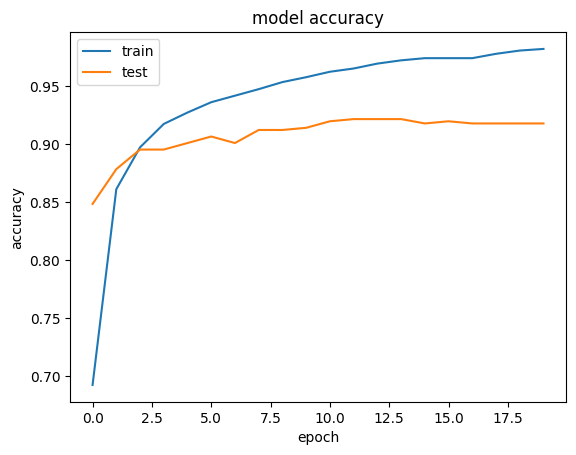

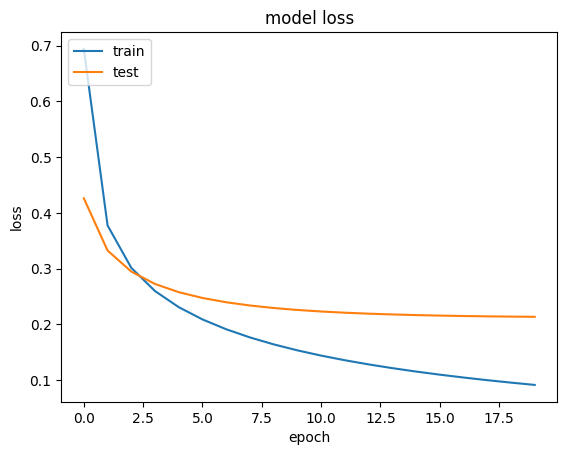

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Final Result**

The above models are used are both feature extraction techniques used for image classification tasks but with differences in performance and accuracy.

EfficientNet has a large number of parameters, which enables it to learn complex features from images. On the other hand, HOG with a classifier is a traditional computer vision technique used for feature extraction. HOG with an ML classifier is computationally less expensive than EfficientNet. However, HOG may not perform as well as EfficientNet on complex image classification tasks, especially when dealing with noisy or cluttered images.


The accuracy in the first classifier is not good as the second. Maybe because the number of images is small to learn enough and make predictions or we must select the most important features by using the feature selection techinuqes or using othe feature extraction usefull in this type of image that foucs on the lights.


# **References**
["Machine Learning Methods in Smart Lighting
Toward Achieving User Comfort: A Survey
](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9762311)
